In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import linear_model
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree

Classification and Regression Tree - Decision Tree belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.
Building a decision tree model for predicting income status based on geographical data and other features.
age, workclass, education, occupation, sex --> x
income --> y 

In [2]:
#3rd assessment - DT, RF
df2 = pd.read_excel(r"C:\Users\rajha\Downloads\Data set.xlsx", sheet_name=2)

In [3]:
#dimension of dataset
df2.shape

(48842, 15)

In [4]:
#data cleaning
df2.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [5]:
## data processing by handling missing values data is huge so we can delete the null 
df2.dropna(inplace=True)


In [6]:
#encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['workclass'] = le.fit_transform(df2['workclass'])
df2['education'] = le.fit_transform(df2['education'])
df2['occupation'] = le.fit_transform(df2['occupation'])
df2['sex'] = le.fit_transform(df2['sex'])
df2['marital-status'] = le.fit_transform(df2['marital-status'])
df2['native-country'] = le.fit_transform(df2['native-country'])
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,<=50K.
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,<=50K.
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,<=50K.
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,<=50K.


In [7]:
df2['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [8]:
df2['income'].unique()
income_mapping = {'<=50K': 'Low Income', '>50K': 'High Income', '<=50K.': 'Low Income', '>50K.': 'High Income'}
# Replace the values in the 'income' column using the mapping
df2['new_income'] = df2['income'].replace(income_mapping)

# Check the unique values in the new 'new_income' column
unique_values_mapped = df2['new_income'].unique()
print(unique_values_mapped)

# Modify the 'income' column directly using the mapping
df2['income'].replace(income_mapping, inplace=True)
df2

['Low Income' 'High Income']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,Low Income,Low Income
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,Low Income,Low Income
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,Low Income,Low Income
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,Low Income,Low Income
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,Low Income,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,Low Income,Low Income
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,Low Income,Low Income
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,Low Income,Low Income
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,Low Income,Low Income


In [9]:
x = df2[['occupation', 'sex']]
y = df2['income']

In [10]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
len(x_train) , len(x_test)

(38096, 9525)

In [12]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [13]:
# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,min_samples_split=40)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=40)

In [14]:
# Check accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7615748031496063


[Text(0.5, 0.875, 'occupation <= 0.5\nentropy = 0.797\nsamples = 38096\nvalue = [9186, 28910]\nclass = High Income'),
 Text(0.25, 0.625, 'sex <= 9.5\nentropy = 0.501\nsamples = 12555\nvalue = [1386, 11169]\nclass = High Income'),
 Text(0.125, 0.375, 'sex <= 4.5\nentropy = 0.424\nsamples = 8566\nvalue = [738, 7828]\nclass = High Income'),
 Text(0.0625, 0.125, 'entropy = 0.531\nsamples = 5306\nvalue = [640, 4666]\nclass = High Income'),
 Text(0.1875, 0.125, 'entropy = 0.195\nsamples = 3260\nvalue = [98, 3162]\nclass = High Income'),
 Text(0.375, 0.375, 'sex <= 10.5\nentropy = 0.64\nsamples = 3989\nvalue = [648, 3341]\nclass = High Income'),
 Text(0.3125, 0.125, 'entropy = 0.82\nsamples = 1788\nvalue = [457, 1331]\nclass = High Income'),
 Text(0.4375, 0.125, 'entropy = 0.426\nsamples = 2201\nvalue = [191, 2010]\nclass = High Income'),
 Text(0.75, 0.625, 'sex <= 9.5\nentropy = 0.888\nsamples = 25541\nvalue = [7800, 17741]\nclass = High Income'),
 Text(0.625, 0.375, 'sex <= 4.5\nentropy = 0

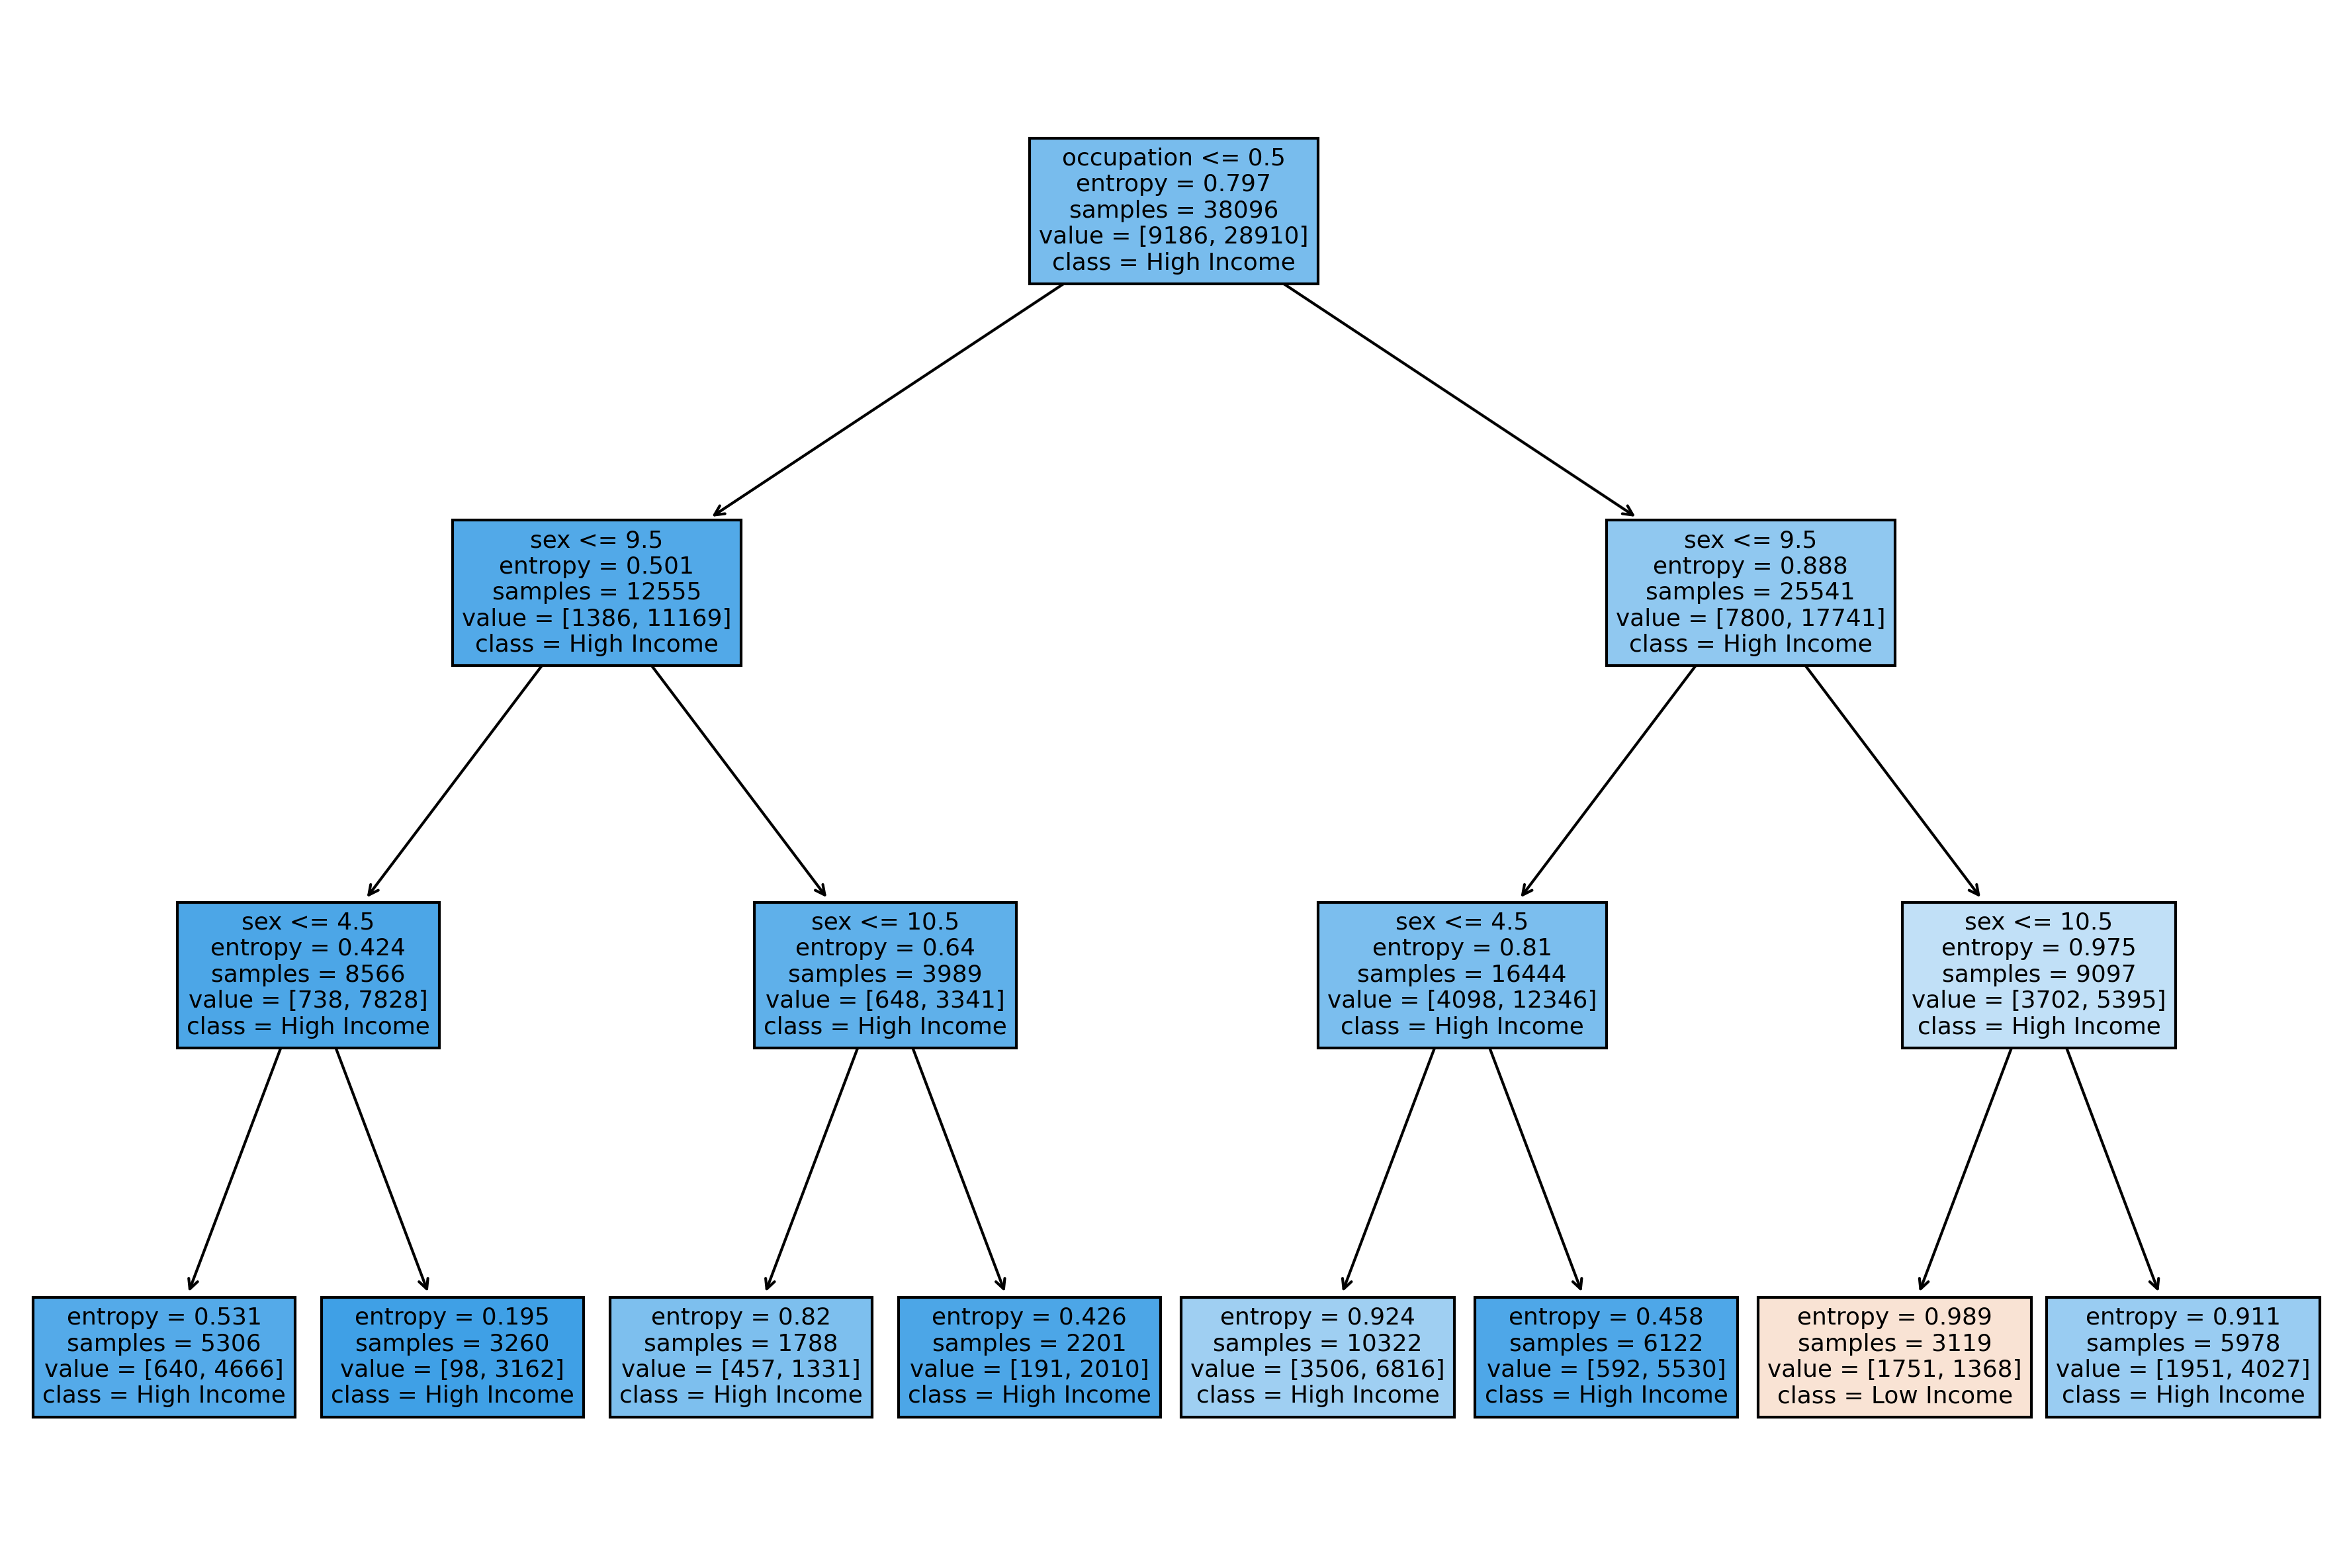

In [15]:
fn=['sex', 'occupation']
cn=df2['income'].unique().tolist()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), dpi=300)
plot_tree(model, feature_names=fn, class_names=cn, filled=True)

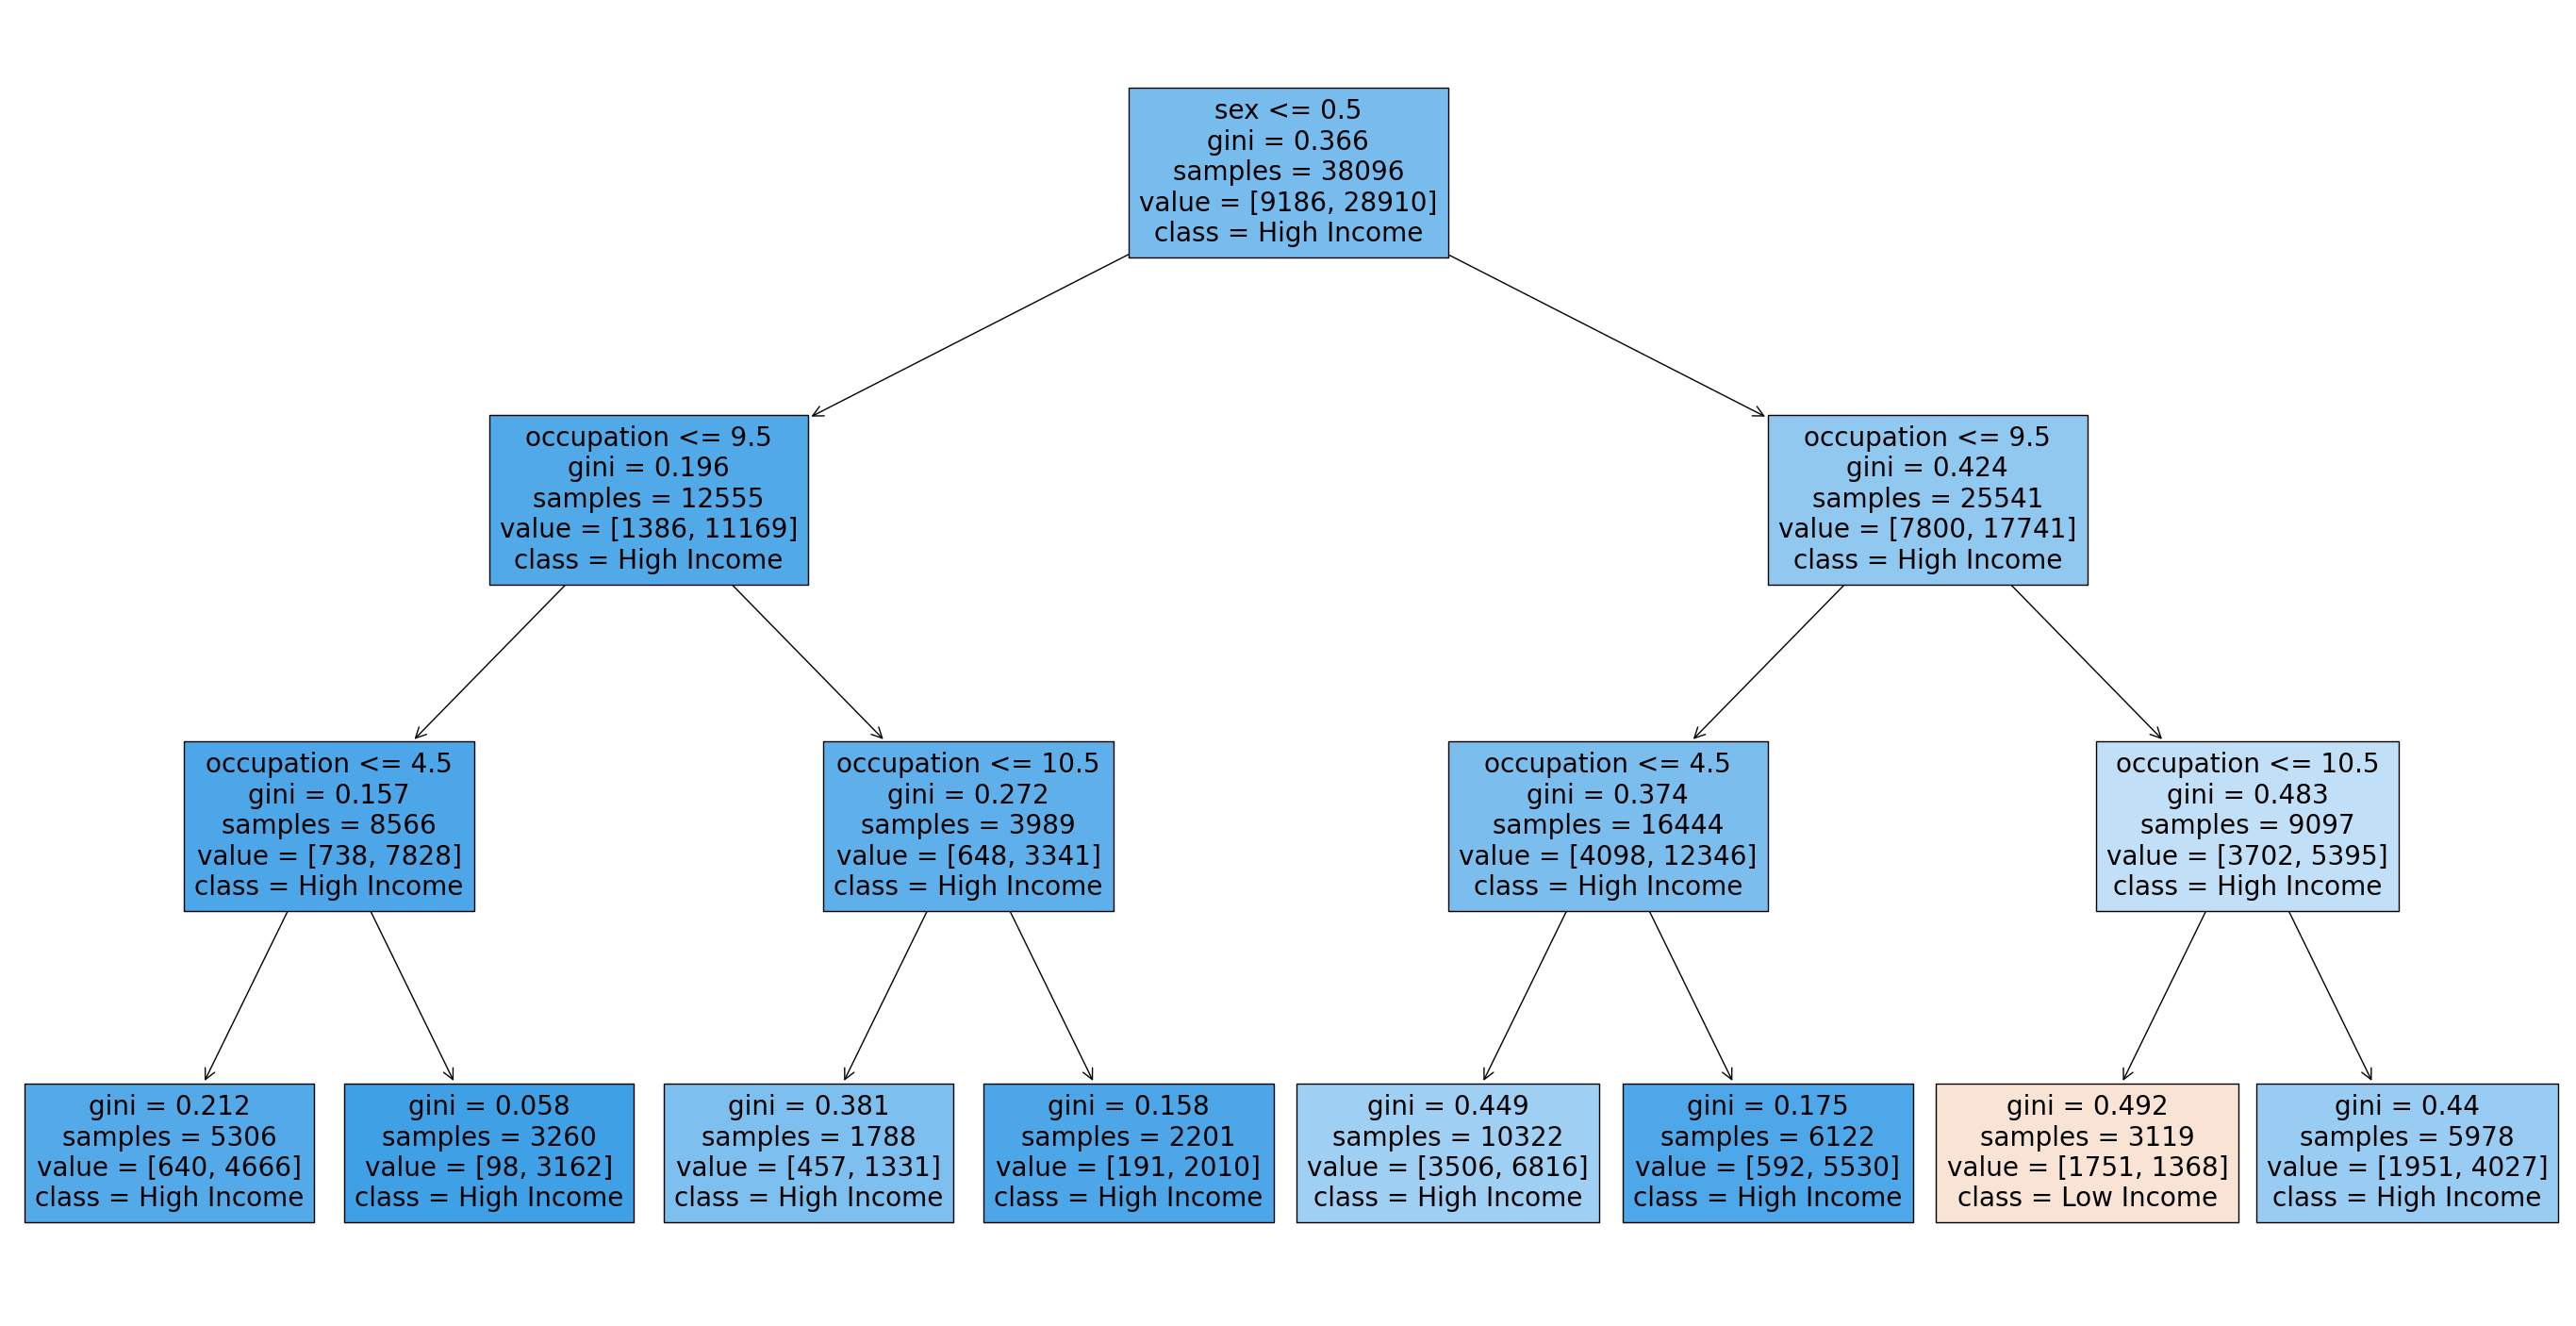

In [16]:
# Plot the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(35, 18))
plot_tree(clf, filled=True, feature_names=['occupation', 'sex'], class_names=df2['income'].unique().tolist())
plt.show()

    The first node has a split on 'occupation' with a threshold of 0.5.
    The second node further splits based on 'sex'.
    It continues recursively, providing information about the split conditions, entropy, samples, class distribution, and child nodes.
    

In [17]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 
preds

array(['Low Income', 'Low Income', 'Low Income', ..., 'Low Income',
       'High Income', 'Low Income'], dtype=object)

In [18]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,High Income,Low Income
income,,
High Income,424,1931
Low Income,340,6830


In [19]:
# Accuracy 
np.mean(preds==y_test) #76.1 is a good model and the accuracy is good 

0.7615748031496063

B) Random Forest is an ensemble learning algorithm that combines the predictions of multiple decision trees to make more accurate and robust predictions. The logic behind the algorithm is based on the concept of “wisdom of the crowd,” where the collective decisions of a group of individuals tend to be more accurate than the decisions of individual members.

In [20]:
df2.drop("new_income", axis=1, inplace = True)
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,Low Income
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,Low Income
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,Low Income
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,Low Income
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,Low Income
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,Low Income
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,Low Income
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,Low Income


In [21]:
x = df2.drop(["fnlwgt", "relationship", "income", "race", "education-num", "workclass", "capital-gain", "capital-loss", "native-country"], axis="columns")
y = df2['income']
x

,age,education,marital-status,occupation,sex,hours-per-week
0,39,9,4,1,1,40
1,50,9,2,4,1,13
2,38,11,0,6,1,40
3,53,1,2,6,1,40
4,28,9,2,10,0,40
...,...,...,...,...,...,...
48836,33,9,4,10,1,40
48837,39,9,0,10,0,36
48839,38,9,2,10,1,50
48840,44,9,0,1,1,40


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['workclass'] = le.fit_transform(df2['workclass'])
df2['education'] = le.fit_transform(df2['education'])
df2['occupation'] = le.fit_transform(df2['occupation'])
df2['sex'] = le.fit_transform(df2['sex'])
df2['marital-status'] = le.fit_transform(df2['marital-status'])
df2['native-country'] = le.fit_transform(df2['native-country'])
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,Low Income
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,Low Income
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,Low Income
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,Low Income
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,Low Income
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,Low Income
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,Low Income
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,Low Income


In [23]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [39]:
print(len(model.estimators_))


20


In [24]:
model.score(x_test, y_test) #80% good model

0.80247777700007

In [25]:
# Making predictions
y_pred = model.predict(x_test)
y_pred

array(['High Income', 'Low Income', 'Low Income', ..., 'Low Income',
       'High Income', 'High Income'], dtype=object)

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1912, 1642],
       [1180, 9553]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

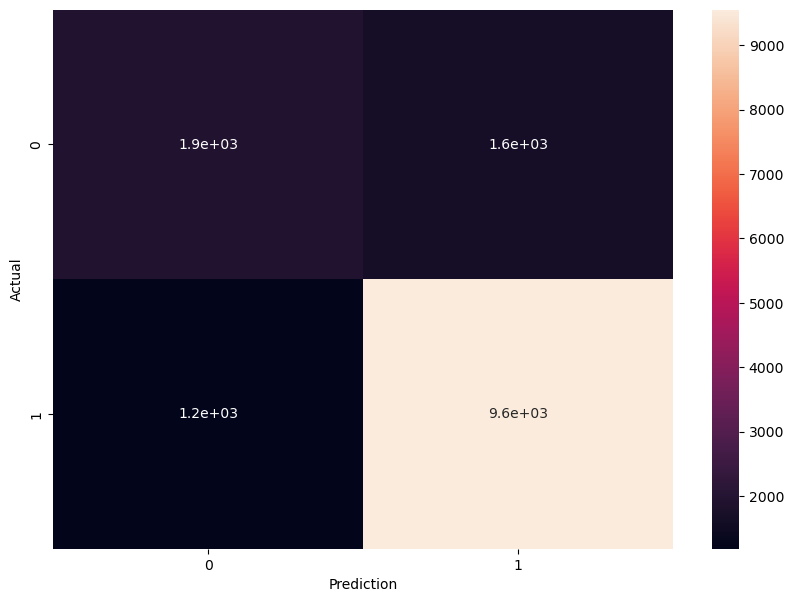

In [27]:
#heatmap
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True)
plt.xlabel("Prediction")
plt.ylabel("Actual")

In [28]:
#for this ROC-AUC score the columns must be in float followed by model building so run the code again from top 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['income'] = le.fit_transform(df2['income'])

In [61]:
# Evaluating the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8021278084972352
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57      3554
           1       0.85      0.89      0.87     10733

    accuracy                           0.80     14287
   macro avg       0.74      0.71      0.72     14287
weighted avg       0.79      0.80      0.80     14287

Confusion Matrix:
 [[1896 1658]
 [1169 9564]]


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and target variable
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)


Cross-Validation Scores: [0.8103937  0.81079378 0.82139857 0.80743385 0.81194876]


Comments on Random Forest:
    The consistency of scores across different folds suggests that the model is stable and not heavily influenced by Training and testing in the dataset
    The model score accuracy is 80% and F1 score is also 87% good classification Random Forest model seems to be performing reasonably well
    Also RF showed better accuracy than the DT as compared 